# Importing Packages and Dataset

In [ ]:
!pip install --upgrade xlrd

In [ ]:
!pip install mlxtend --upgrade

In [ ]:
!pip install --upgrade verstack

In [1]:
import numpy as np
import sklearn
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data Imputation
from sklearn.impute import SimpleImputer, KNNImputer

# Feature Selection
from sklearn import linear_model
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from verstack.stratified_continuous_split import scsplit

# AI Models
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor

# Evaluation Metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error
from mlxtend.evaluate import bias_variance_decomp, paired_ttest_5x2cv

In [23]:
# To load the data and display some rows
all_df = pd.read_excel(r"Dataset\AirQualityUCI.xlsx")
all_df.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2004-03-10,18:00:00,2.6,1360.00,150,11.881723,1045.50,166.0,1056.25,113.0,1692.00,1267.50,13.60,48.875001,0.757754
1,2004-03-10,19:00:00,2.0,1292.25,112,9.397165,954.75,103.0,1173.75,92.0,1558.75,972.25,13.30,47.700000,0.725487
2,2004-03-10,20:00:00,2.2,1402.00,88,8.997817,939.25,131.0,1140.00,114.0,1554.50,1074.00,11.90,53.975000,0.750239
3,2004-03-10,21:00:00,2.2,1375.50,80,9.228796,948.25,172.0,1092.00,122.0,1583.75,1203.25,11.00,60.000000,0.786713
4,2004-03-10,22:00:00,1.6,1272.25,51,6.518224,835.50,131.0,1205.00,116.0,1490.00,1110.00,11.15,59.575001,0.788794


In [24]:
# Size of the dataset
all_df.shape

(9357, 15)

In [25]:
# Change the values of -200 to null
all_df[all_df == -200] = np.NaN
all_df=all_df.dropna(subset=['AH']).reset_index(drop=True)
all_df.isnull().sum()

Date                0
Time                0
CO(GT)           1647
PT08.S1(CO)         0
NMHC(GT)         8104
C6H6(GT)            0
PT08.S2(NMHC)       0
NOx(GT)          1595
PT08.S3(NOx)        0
NO2(GT)          1598
PT08.S4(NO2)        0
PT08.S5(O3)         0
T                   0
RH                  0
AH                  0
dtype: int64

# Data Visualisation

In [5]:
#See the info of the Data
all_df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8991 entries, 0 to 8990
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           8991 non-null   datetime64[ns]
 1   Time           8991 non-null   object        
 2   CO(GT)         7344 non-null   float64       
 3   PT08.S1(CO)    8991 non-null   float64       
 4   NMHC(GT)       887 non-null    float64       
 5   C6H6(GT)       8991 non-null   float64       
 6   PT08.S2(NMHC)  8991 non-null   float64       
 7   NOx(GT)        7396 non-null   float64       
 8   PT08.S3(NOx)   8991 non-null   float64       
 9   NO2(GT)        7393 non-null   float64       
 10  PT08.S4(NO2)   8991 non-null   float64       
 11  PT08.S5(O3)    8991 non-null   float64       
 12  T              8991 non-null   float64       
 13  RH             8991 non-null   float64       
 14  AH             8991 non-null   float64       
dtypes: datetime64[ns](1),

In [6]:
# Basic Stats of all features
all_df.describe()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
count,7344.000000,8991.000000,887.000000,8991.000000,8991.000000,7396.000000,8991.000000,7393.000000,8991.000000,8991.000000,8991.000000,8991.000000,8991.000000
mean,2.129711,1099.707856,218.607666,10.082993,939.029205,242.174351,835.370973,112.129974,1456.143486,1022.780725,18.316054,49.232360,1.025530
std,1.436472,217.084571,206.615130,7.449640,266.829000,206.304577,256.815106,47.618852,346.204540,398.480897,8.832888,17.316389,0.403813
min,0.100000,647.250000,7.000000,0.149048,383.250000,2.000000,322.000000,2.000000,551.000000,221.000000,-1.900000,9.175000,0.184679
25%,1.100000,936.750000,66.000000,4.436942,734.375000,97.000000,657.875000,77.000000,1226.625000,731.375000,11.787500,35.812500,0.736769
50%,1.800000,1063.000000,145.000000,8.239851,909.000000,178.000000,805.500000,108.500000,1462.750000,963.250000,17.750000,49.550000,0.995395
75%,2.800000,1231.250000,297.000000,13.988478,1116.250000,321.000000,969.250000,140.000000,1673.500000,1273.375000,24.400000,62.500001,1.313701
max,11.900000,2039.750000,1189.000000,63.741476,2214.000000,1479.000000,2682.750000,332.600000,2775.000000,2522.750000,44.600000,88.725000,2.231036


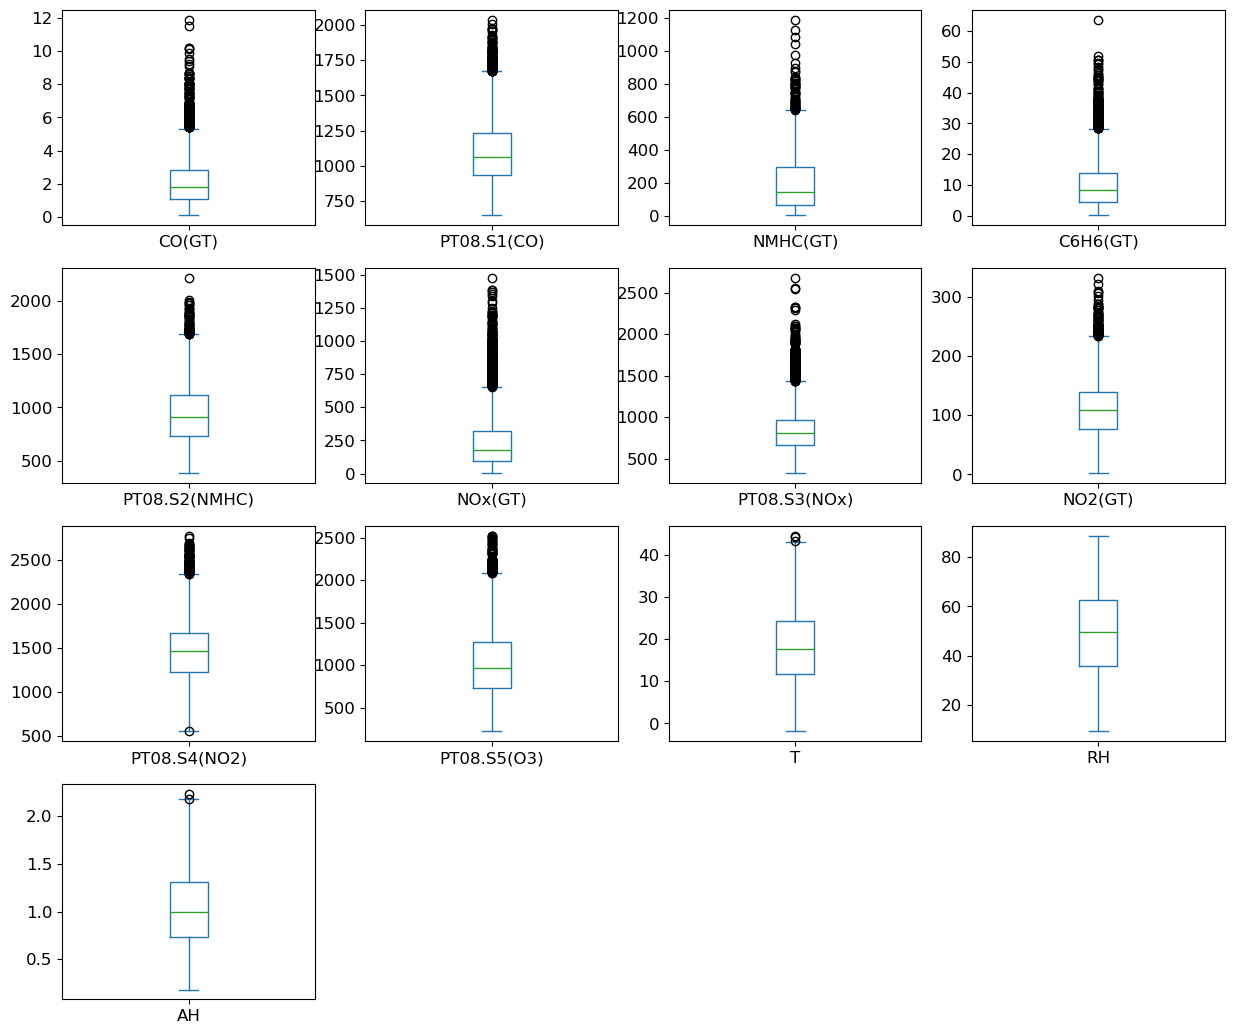

In [7]:
# Boxplot to see the outliers
data_mean = all_df.copy()
data_mean.plot(kind='box', subplots=True, layout=(30,4), sharex=False, sharey=False, fontsize=12, figsize=(15,100));

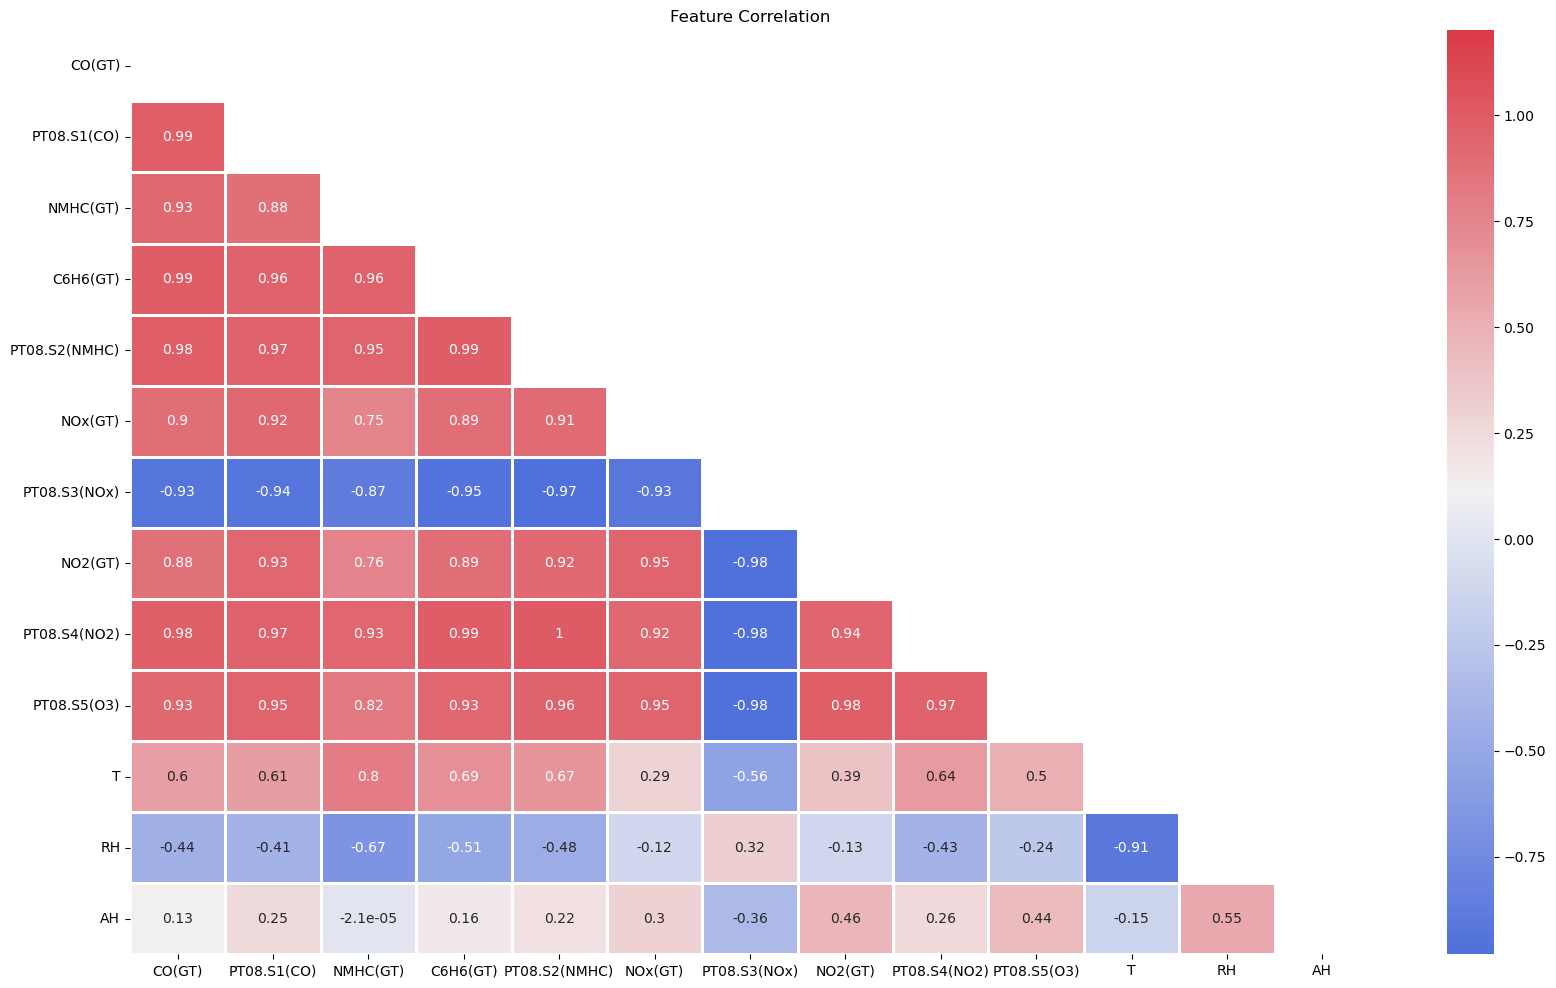

In [8]:
# Compute the correlation matrix to observe the correlations between pair of features. 
cor_df = all_df.copy()
cor_df = cor_df.iloc[:,0:15]
cor_df.shape
corrMatt = cor_df.iloc[1:15,:].corr()
# Generate a mask for the upper triangle
mask = np.zeros_like(corrMatt)
mask[np.triu_indices_from(mask)] = True
# Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(20, 12))
plt.title('Feature Correlation')
# Generate a custom diverging colormap
cmap = sns.diverging_palette(260, 10, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corrMatt, vmax=1.2, square=False, cmap=cmap, mask=mask, 
ax=ax, annot=True, fmt='.2g', linewidths=1);

# Split data to test and training set

In [34]:
# Split the dataframe to X and Y variables
X = all_df.drop(['Date', 'Time', 'T', 'RH', 'AH'], axis=1)
Y = all_df['AH']
Y

0       0.757754
1       0.725487
2       0.750239
3       0.786713
4       0.788794
          ...   
8986    0.756824
8987    0.711864
8988    0.640649
8989    0.513866
8990    0.502804
Name: AH, Length: 8991, dtype: float64

In [39]:
# Split the data into train, valid, test (70%, 10%, 20%)
#Xs_train, Xs_test, y_train, y_test = scsplit(X, Y, stratify=Y, test_size=0.2, random_state=5, continuous=True)

Xs_train, Xs_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=5)
Xs_train.reset_index(inplace=True, drop=True)
y_train.reset_index(inplace=True, drop=True)
Xs_test.reset_index(inplace=True, drop=True)
y_test.reset_index(inplace=True, drop=True)

In [ ]:
# Normalise the training dataset
features_list = list(Xs_train.columns)
scaler = StandardScaler()
scaler.fit(Xs_train)
Xs_train_norm = scaler.transform(Xs_train)
Xs_train = pd.DataFrame(Xs_train_norm, columns=features_list)
train_dataset = pd.concat([y_train, Xs_train], axis=1)

# Use the settings for training dataset to normalise testing dataset too
Xs_test_norm = scaler.transform(Xs_test)
Xs_test = pd.DataFrame(Xs_test_norm, columns=features_list)
test_dataset = pd.concat([y_test, Xs_test], axis=1)

# Functions for different method

In [ ]:
# List of methods we are using
with_NMHC = ['with', 'without']
outliers = ['none', 'delete', 'whiskerCapped', 'median', 'mean']
null_value = ['delete', 'median', 'mean', 'nearest']
feature_selection = ['none', 'lasso', 'pca']
method_list = []
for a in with_NMHC:
  for b in outliers:
    for c in null_value:
      for d in feature_selection:
        method_list.append((a,b,c,d))

print(len(method_list))

## Function to deal with NMHC column


In [ ]:
# Method to deal with NMHC column because there is too much null data
def NMHC(method):
  train_df = train_dataset.copy()
  test_df = test_dataset.copy()
  if method == 'with':
    return train_df, test_df
  elif method == 'without':
    train_df = train_df.drop(['NMHC(GT)'], axis=1)
    test_df = test_df.drop(['NMHC(GT)'], axis=1)
    return train_df, test_df
  else:
    print("No Outliers method found")

## Function to deal with Outliers


In [ ]:
# Method to deal with outliers
def outliers(method, dataset):
  q1 = dataset.quantile(0.25)
  q3 = dataset.quantile(0.75)
  iqr = q3 - q1
  factor = 1.5
  lower_whisker = q1 - (factor * iqr)
  upper_whisker = q3 + (factor * iqr)
  features_list = list(dataset.columns)
  features_list.remove(features_list[0])
  
  if method == 'none':
    return dataset

  elif method == 'delete':
    dataset = dataset[~((dataset < (q1 - factor * iqr)) | (dataset > (q3 + factor * iqr))).any(axis=1)].reset_index(drop=True)
    return dataset

  elif method == 'whiskerCapped':
    for feature_name in features_list:
      dataset.loc[dataset[feature_name] < dataset[feature_name].quantile(0.25), feature_name] = dataset[feature_name].quantile(0.25)
      dataset.loc[dataset[feature_name] > dataset[feature_name].quantile(0.75), feature_name] = dataset[feature_name].quantile(0.75)
    return dataset

  elif method == 'median':
    for feature_name in features_list:  
      dataset.loc[dataset[feature_name] < dataset[feature_name].quantile(0.25), feature_name] = dataset[feature_name].median()
      dataset.loc[dataset[feature_name] > dataset[feature_name].quantile(0.75), feature_name] = dataset[feature_name].median()
    return dataset

  elif method == 'mean':
    for feature_name in features_list:
      dataset.loc[dataset[feature_name] < dataset[feature_name].quantile(0.25), feature_name] = dataset[feature_name].mean()
      dataset.loc[dataset[feature_name] > dataset[feature_name].quantile(0.75), feature_name] = dataset[feature_name].mean()
    return dataset

  else:
    print("No Outliers method found")

## Function to deal with Null Values

In [ ]:
# Method to deal with null values
def null_value(method, train_dataset, test_dataset):
  if method == "delete":
    train_dataset = train_dataset.dropna(axis=0, how='any').reset_index(drop=True)
    test_dataset = test_dataset.dropna(axis=0, how='any').reset_index(drop=True)

    return train_dataset, test_dataset

  else:
    X_train = train_dataset.drop(['AH'], axis=1)
    y_train = train_dataset['AH']

    X_test = test_dataset.drop(['AH'], axis=1)
    y_test = test_dataset['AH']
    features_name = list(X_train.columns)

    if method == 'median':
      impute_median = SimpleImputer(missing_values=np.nan, strategy='median')
      impute_median.fit(X_train, y_train)
      X_train = impute_median.transform(X_train)

      # Use setting from training set
      X_test = impute_median.transform(X_test)

      train_dataset = pd.concat([y_train, pd.DataFrame(X_train, columns=features_name)], axis=1)
      test_dataset = pd.concat([y_test, pd.DataFrame(X_test, columns=features_name)], axis=1)

      return train_dataset, test_dataset

    elif method == 'mean':
      impute_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
      impute_mean.fit(X_train, y_train)
      X_train = impute_mean.transform(X_train)

      # Use setting from training set
      X_test = impute_mean.transform(X_test)

      train_dataset = pd.concat([y_train, pd.DataFrame(X_train, columns=features_name)], axis=1)
      test_dataset = pd.concat([y_test, pd.DataFrame(X_test, columns=features_name)], axis=1)

      return train_dataset, test_dataset

    elif method == 'nearest':
      imputer_knn = KNNImputer(missing_values=np.nan, n_neighbors=10)
      imputer_knn.fit(X_train, y_train)
      X_train = imputer_knn.transform(X_train)

      # Use setting from training set
      X_test = imputer_knn.transform(X_test)

      train_dataset = pd.concat([y_train, pd.DataFrame(X_train, columns=features_name)], axis=1)
      test_dataset = pd.concat([y_test, pd.DataFrame(X_test, columns=features_name)], axis=1)

      return train_dataset, test_dataset

    else:
        print("No Data Imputation method found")

## Function for Feature Scaling

In [ ]:
# Feature Scaling Method
def feature_scaling(method, train_dataset, test_dataset):
  if method == 'none':
    return train_dataset, test_dataset

  elif method == 'lasso':
    features_name = []
    X_train = train_dataset.drop(['AH'], axis=1)
    y_train = train_dataset['AH']
    
    features_list = list(X_train.columns)

    X_test = test_dataset.drop(['AH'], axis=1)
    y_test = test_dataset['AH']

    # Lasso Model
    lasso = linear_model.Lasso(max_iter=50, random_state=5, alpha=0.1).fit(X_train,y_train.values)
    model = SelectFromModel(lasso, prefit=True)
    features_output = model.get_support(indices=True)
    train_dataset = model.transform(X_train)

    # Use setting from training set
    test_dataset = model.transform(X_test)

    for i in features_output:
        features_name.append(features_list[i])

    X_train = pd.DataFrame(train_dataset, columns=features_name)
    X_test = pd.DataFrame(test_dataset, columns=features_name)

    train_dataset = pd.concat([y_train, X_train], axis=1)
    test_dataset = pd.concat([y_test, X_test], axis=1)

    return train_dataset, test_dataset

  elif method == 'pca':
    X_train = train_dataset.drop(['AH'], axis=1)
    y_train = train_dataset['AH']

    X_test = test_dataset.drop(['AH'], axis=1)
    y_test = test_dataset['AH']

    # PCA Model
    pca = PCA(.95)
    pca.fit(X_train)
    PCA(copy=True, iterated_power='auto', n_components=0.95, random_state=5,svd_solver='auto', whiten=False)
    X_train = pca.transform(X_train)

    # Use setting from training set
    X_test = pca.transform(X_test)

    train_dataset = pd.concat([y_train, pd.DataFrame(X_train)], axis=1)
    test_dataset = pd.concat([y_test, pd.DataFrame(X_test)], axis=1)

    return train_dataset, test_dataset

  else:
    print("No Feature Selection method found")

# AI Models


## Linear Regression

In [ ]:
# Linear Regression for the processed dataset
lr_mae = []
lr_mse = []
lr_loss = []
lr_bias = []
lr_variance = []

for i in range(0, len(method_list)):
  # Get the data based on the method we want to try
  train, test = NMHC(method_list[i][0])
  train, test = null_value(method_list[i][2], outliers(method_list[i][1], train), test)
  train, test = feature_scaling(method_list[i][3], train, test)

  Xs_train = train.drop(['AH'], axis=1)
  Xs_test = test.drop(['AH'], axis=1)
  y_train = train['AH']
  y_test = test['AH']

  Xs_train, Xs_val, y_train, y_val = scsplit(Xs_train, y_train, stratify=y_train, test_size=0.125, random_state=5, continuous=True)

  lr = LinearRegression()
  lr.fit(Xs_train, y_train)

  gs = GridSearchCV(lr, param_grid={'fit_intercept': (True, False)},
                    cv = 5, n_jobs = 5, scoring = 'r2')
  gs.fit(Xs_val, y_val)

  lr.set_params(**gs.best_params_)
  lr.fit(Xs_train, y_train)
  lr_predict = lr.predict(Xs_test)
    
  # Scoring
  lr_mae.append(mean_absolute_error(y_test, lr_predict))
  lr_mse.append(mean_squared_error(y_test, lr_predict))

## KNN Regressor

In [ ]:
# K-Nearest Neighbour Regression for the processed dataset
knn_mae = []
knn_mse = []
knn_loss = []
knn_bias = []
knn_variance = []

for i in range(0, len(method_list)):
  # Get the data based on the method we want to try
  train, test = NMHC(method_list[i][0])
  train, test = null_value(method_list[i][2], outliers(method_list[i][1], train), test)
  train, test = feature_scaling(method_list[i][3], train, test)

  Xs_train = train.drop(['AH'], axis=1)
  Xs_test = test.drop(['AH'], axis=1)
  y_train = train['AH']
  y_test = test['AH']

  Xs_train, Xs_val, y_train, y_val = scsplit(Xs_train, y_train, stratify=y_train, test_size=0.125, random_state=5, continuous=True)

  knn = KNeighborsRegressor()
  knn.fit(Xs_train, y_train)
  
  distributions={'weights': ('uniform', 'distance'),
                 'algorithm': ('auto', 'ball_tree', 'kd_tree', 'brute'),
                 'n_neighbors': range(3,50)}

  gs = RandomizedSearchCV(knn, distributions, cv = 5, n_jobs = 5, random_state = 5, scoring = 'r2', n_iter = 20)
  gs.fit(Xs_val, y_val)

  knn.set_params(**gs.best_params_)
  knn.fit(Xs_train, y_train)
  knn_predict = knn.predict(Xs_test)

  # Scoring
  knn_mae.append(mean_absolute_error(y_test, knn_predict))
  knn_mse.append(mean_squared_error(y_test, knn_predict))

## Support Vector Regression

In [ ]:
# Support Vector Regression for the processed dataset
svr_mae = []
svr_mse = []
svr_loss = []
svr_bias = []
svr_variance = []

for i in range(0, len(method_list)):
  # Get the data based on the method we want to try
  train, test = NMHC(method_list[i][0])
  train, test = null_value(method_list[i][2], outliers(method_list[i][1], train), test)
  train, test = feature_scaling(method_list[i][3], train, test)

  Xs_train = train.drop(['AH'], axis=1)
  Xs_test = test.drop(['AH'], axis=1)
  y_train = train['AH']
  y_test = test['AH']

  Xs_train, Xs_val, y_train, y_val = scsplit(Xs_train, y_train, stratify=y_train, test_size=0.125, random_state=5, continuous=True)


  svr = SVR(max_iter = 500)
  svr.fit(Xs_train, y_train)

  distributions = {'kernel': ('linear', 'rbf', 'sigmoid', 'poly'),
                   'gamma': ('scale', 'auto'),
                   'C': np.arange(0, 5, 0.1), 
                   'epsilon': np.arange(0, 5, 0.1)}
  gs = RandomizedSearchCV(svr, distributions, cv = 5, n_jobs = 5, random_state = 5, scoring = 'r2', n_iter = 20)
  gs.fit(Xs_val, y_val)

  svr.set_params(**gs.best_params_)
  svr.fit(Xs_train, y_train)
  svr_predict = svr.predict(Xs_test)

  # Scoring
  svr_mae.append(mean_absolute_error(y_test, svr_predict))
  svr_mse.append(mean_squared_error(y_test, svr_predict))

## Decision Tree Regressor

In [ ]:
# Decision Tree Regressor for the processed dataset
dt_mae = []
dt_mse = []
dt_loss = []
dt_bias = []
dt_variance = []

for i in range(0, len(method_list)):
  # Get the data based on the method we want to try
  train, test = NMHC(method_list[i][0])
  train, test = null_value(method_list[i][2], outliers(method_list[i][1], train), test)
  train, test = feature_scaling(method_list[i][3], train, test)

  Xs_train = train.drop(['AH'], axis=1)
  Xs_test = test.drop(['AH'], axis=1)
  y_train = train['AH']
  y_test = test['AH']

  Xs_train, Xs_val, y_train, y_val = scsplit(Xs_train, y_train, stratify=y_train, test_size=0.125, random_state=5, continuous=True)


  dt = DecisionTreeRegressor(random_state=5)
  dt.fit(Xs_train, y_train)

  gs = GridSearchCV(dt, param_grid={'splitter': ('best', 'random'), 
                                    'max_features': ('auto', 'sqrt', 'log2')},
                    cv = 5, n_jobs = 5, scoring = 'r2')
  gs.fit(Xs_val, y_val)

  dt.set_params(**gs.best_params_)
  dt.fit(Xs_train, y_train)
  dt_predict = dt.predict(Xs_test)

  # Scoring
  dt_mae.append(mean_absolute_error(y_test, dt_predict))
  dt_mse.append(mean_squared_error(y_test, dt_predict))

## Random Forest Regressor

In [ ]:
# Random Forest Regressor for the processed dataset
rf_mae = []
rf_mse = []
rf_loss = []
rf_bias = []
rf_variance = []

for i in range(0, len(method_list)):
  # Get the data based on the method we want to try
  train, test = NMHC(method_list[i][0])
  train, test = null_value(method_list[i][2], outliers(method_list[i][1], train), test)
  train, test = feature_scaling(method_list[i][3], train, test)

  Xs_train = train.drop(['AH'], axis=1)
  Xs_test = test.drop(['AH'], axis=1)
  y_train = train['AH']
  y_test = test['AH']

  Xs_train, Xs_val, y_train, y_val = scsplit(Xs_train, y_train, stratify=y_train, test_size=0.125, random_state=5, continuous=True)


  rf = RandomForestRegressor(random_state=5, n_jobs = 100)
  rf.fit(Xs_train, y_train)

  distributions={'n_estimators': range(50,500), 
                 'criterion': ('squared_error', 'absolute_error', 'friedman_mse', 'poisson'),
                 'max_features': ('auto', 'sqrt', 'log2')}

  gs = RandomizedSearchCV(rf, distributions, cv = 5, n_jobs = 5, random_state = 5, scoring = 'r2', n_iter = 20)
  gs.fit(Xs_val, y_val)

  rf.set_params(**gs.best_params_)
  rf.fit(Xs_train, y_train)
  rf_predict = rf.predict(Xs_test)

  # Scoring
  rf_mae.append(mean_absolute_error(y_test, rf_predict))
  rf_mse.append(mean_squared_error(y_test, rf_predict))

## MLPRegressor

In [ ]:
# MLP Regressor for the processed dataset
nn_mae = []
nn_mse = []
nn_loss = []
nn_bias = []
nn_variance = []

for i in range(0, len(method_list)):
  # Get the data based on the method we want to try
  train, test = NMHC(method_list[i][0])
  train, test = null_value(method_list[i][2], outliers(method_list[i][1], train), test)
  train, test = feature_scaling(method_list[i][3], train, test)

  Xs_train = train.drop(['AH'], axis=1)
  Xs_test = test.drop(['AH'], axis=1)
  y_train = train['AH']
  y_test = test['AH']

  Xs_train, Xs_val, y_train, y_val = scsplit(Xs_train, y_train, stratify=y_train, test_size=0.125, random_state=5, continuous=True)


  nn = MLPRegressor(random_state=5, max_iter = 500)
  nn.fit(Xs_train, y_train)

  distributions={'activation': ('identity', 'logistic', 'tanh', 'relu'),
                'hidden_layer_sizes': range(1,500),
                'solver': ('lbfgs', 'sgd', 'adam'),
                'alpha': np.arange(0, 1, 0.001),
                'learning_rate': ('constant', 'invscaling', 'adaptive')}

  gs = RandomizedSearchCV(nn, distributions, cv = 5, n_jobs = 5, random_state = 5, scoring = 'r2', n_iter = 20)
  gs.fit(Xs_val, y_val)

  nn.set_params(**gs.best_params_)
  nn.fit(Xs_train, y_train)
  nn_predict = nn.predict(Xs_test)
                                                      
  # Scoring
  nn_mae.append(mean_absolute_error(y_test, nn_predict))
  nn_mse.append(mean_squared_error(y_test, nn_predict))

# Evaluation Metrics

## Result Table

### MAE Scoring

In [ ]:
# MAE scoring for all methods used in a tabular form
mae_result_list = list(zip(method_list, lr_mae, knn_mae, svr_mae, dt_mae, rf_mae, nn_mae))
column_name = ['method', 'lr mae', 'knn mae', 'svr mae', 'dt mae', 'rf mae', 'nn mae']

mae_result = pd.DataFrame(mae_result_list, columns=column_name)
mae_result[['NMHC', 'outliers', 'null', 'features']] = pd.DataFrame(mae_result['method'].tolist(), index=mae_result.index)
mae_result = mae_result[['NMHC', 'outliers', 'null', 'features', 'lr mae', 'knn mae', 'svr mae', 'dt mae', 'rf mae', 'nn mae']]
mae_result

In [ ]:
# See the average of all NMHC methods
model_column = ['lr mae', 'knn mae', 'svr mae', 'dt mae', 'rf mae', 'nn mae']
               
NMHC_average = mae_result.copy()
NMHC_average.drop(('outliers'), inplace=True, axis=1)
NMHC_average.drop(('null'), inplace=True, axis=1)
NMHC_average.drop(('features'), inplace=True, axis=1)

NMHC_average = NMHC_average.groupby('NMHC')[model_column].mean()
NMHC_average

In [ ]:
# See the average of all outliers methods              
outliers_average = mae_result.copy()
outliers_average = outliers_average[outliers_average.NMHC == 'without']

outliers_average.drop(('null'), inplace=True, axis=1)
outliers_average.drop(('features'), inplace=True, axis=1)

outliers_average = outliers_average.groupby('outliers')[model_column].mean()
outliers_average

In [ ]:
# See the average of all null methods            
null_average = mae_result.copy()
null_average = null_average[null_average.NMHC == 'without']
null_average = null_average[null_average.outliers == 'delete']

null_average.drop(('features'), inplace=True, axis=1)

null_average = null_average.groupby('null')[model_column].mean()
null_average

In [ ]:
# See the average of all feature selection methods              
features_average = mae_result.copy()
features_average = features_average[features_average.NMHC == 'without']
features_average = features_average[features_average.outliers == 'delete']
features_average = features_average[features_average.null == 'delete']

features_average = features_average.groupby('features')[model_column].mean()
features_average

### MSE Scoring

In [ ]:
# MSE scoring for all methods used in a tabular form
mse_result_list = list(zip(method_list, lr_mse, knn_mse, svr_mse, dt_mse, rf_mse, nn_mse))
column_name = ['method', 'lr mse', 'knn mse', 'svr mse', 'dt mse', 'rf mse', 'nn mse']

mse_result = pd.DataFrame(mse_result_list, columns=column_name)
mse_result[['NMHC', 'outliers', 'null', 'features']] = pd.DataFrame(mae_result['method'].tolist(), index=mae_result.index)
mse_result = mse_result[['NMHC', 'outliers', 'null', 'features', 'lr mse', 'knn mse', 'svr mse', 'dt mse', 'rf mse', 'nn mse']]
mse_result

In [ ]:
# See the average of all NMHC methods   
model_column = ['lr mse', 'knn mse', 'svr mse', 'dt mse', 'rf mse', 'nn mse']

NMHC_average = mse_result.copy()
NMHC_average.drop(('outliers'), inplace=True, axis=1)
NMHC_average.drop(('null'), inplace=True, axis=1)
NMHC_average.drop(('features'), inplace=True, axis=1)

NMHC_average = NMHC_average.groupby('NMHC')[model_column].mean()
NMHC_average

In [ ]:
# See the average of all outliers methods             
outliers_average = mse_result.copy()
outliers_average = outliers_average[outliers_average.NMHC == 'with']

outliers_average.drop(('null'), inplace=True, axis=1)
outliers_average.drop(('features'), inplace=True, axis=1)

outliers_average = outliers_average.groupby('outliers')[model_column].mean()
outliers_average

In [ ]:
# See the average of all null methods              
null_average = mse_result.copy()
null_average = null_average[null_average.NMHC == 'with']
null_average = null_average[null_average.outliers == 'delete']

null_average.drop(('features'), inplace=True, axis=1)

null_average = null_average.groupby('null')[model_column].mean()
null_average

In [ ]:
# See the average of all feature selection methods 
features_average = mse_result.copy()
features_average = features_average[features_average.NMHC == 'with']
features_average = features_average[features_average.outliers == 'delete']
features_average = features_average[features_average.null == 'delete']

features_average = features_average.groupby('features')[model_column].mean()
features_average

# Final Model After Settings

## Get the data using functions

In [ ]:
# Get the final data based on the result of the method list using the function created
train, test = NMHC('without')
train, test = null_value('delete', outliers('delete', train), test)
train, test = feature_scaling('lasso', train, test)

Xs_train = train.drop(['AH'], axis=1)
Xs_test = test.drop(['AH'], axis=1)
y_train = train['AH']
y_test = test['AH']

Xs_train, Xs_val, y_train, y_val = scsplit(Xs_train, y_train, stratify=y_train, test_size=0.125, random_state=5, continuous=True)

models = []

## AI Models

### Linear Regression

In [ ]:
lr = LinearRegression()
lr.fit(Xs_train, y_train)

distributions = {'fit_intercept': (True, False)}
gs = RandomizedSearchCV(lr, distributions, cv = 5, n_jobs = 5, random_state = 5, scoring = 'r2', n_iter = 20)
gs.fit(Xs_val, y_val)
print(gs.best_params_)

lr.set_params(**gs.best_params_)
lr.fit(Xs_train, y_train)
lr_predict = lr.predict(Xs_test)
avg_expected_loss, avg_bias, avg_var = bias_variance_decomp(lr, Xs_train.values, y_train.values, Xs_test.values, y_test.values, 
                                                            loss='mse', random_seed=5)
# Scoring
lr_mae = mean_absolute_error(y_test, lr_predict)
lr_mse = mean_squared_error(y_test, lr_predict)
lr_loss = avg_expected_loss
lr_bias = avg_bias
lr_variance = avg_var

# Get models to do statistical test
models.append(lr)

### KNN Regressor

In [ ]:
knn = KNeighborsRegressor()
knn.fit(Xs_train, y_train)
  
distributions={'weights': ('uniform', 'distance'),
               'algorithm': ('auto', 'ball_tree', 'kd_tree', 'brute'),
               'n_neighbors': range(3,50)}

gs = RandomizedSearchCV(knn, distributions, cv = 5, n_jobs = 5, random_state = 5, scoring = 'r2', n_iter = 20)
gs.fit(Xs_val, y_val)
print(gs.best_params_)

knn.set_params(**gs.best_params_)
knn.fit(Xs_train, y_train)
knn_predict = knn.predict(Xs_test)
avg_expected_loss, avg_bias, avg_var = bias_variance_decomp(knn, Xs_train.values, y_train.values, Xs_test.values, y_test.values, 
                                                            loss='mse', random_seed=5)
# Scoring
knn_mae = mean_absolute_error(y_test, knn_predict)
knn_mse = mean_squared_error(y_test, knn_predict)
knn_loss = avg_expected_loss
knn_bias = avg_bias
knn_variance = avg_var

# Get models to do statistical test
models.append(knn)

### Support Vector Regressor

In [ ]:
svr = SVR(max_iter = 500)
svr.fit(Xs_train, y_train)

distributions = {'kernel': ('linear', 'rbf', 'sigmoid', 'poly'),
                 'gamma': ('scale', 'auto'),
                 'C': np.arange(0, 5, 0.1),
                 'epsilon': np.arange(0, 5, 0.1)}
gs = RandomizedSearchCV(svr, distributions, cv = 5, n_jobs = 5, random_state = 5, scoring = 'r2', n_iter = 20)
gs.fit(Xs_val, y_val)
print(gs.best_params_)

svr.set_params(**gs.best_params_)
svr.fit(Xs_train, y_train)
svr_predict = svr.predict(Xs_test)
avg_expected_loss, avg_bias, avg_var = bias_variance_decomp(svr, Xs_train.values, y_train.values, Xs_test.values, y_test.values, 
                                                            loss='mse', random_seed=5)
# Scoring
svr_mae = mean_absolute_error(y_test, svr_predict)
svr_mse = mean_squared_error(y_test, svr_predict)
svr_loss = avg_expected_loss
svr_bias = avg_bias
svr_variance = avg_var

# Get models to do statistical test
models.append(svr)

### Decision Tree Regressor

In [ ]:
dt = DecisionTreeRegressor(random_state=5)
dt.fit(Xs_train, y_train)

distributions={
    'splitter': ('best', 'random'),
    'max_features': ('auto', 'sqrt', 'log2')}
gs = RandomizedSearchCV(dt, distributions, cv = 5, n_jobs = 5, random_state = 5, scoring = 'r2', n_iter = 20)
gs.fit(Xs_val, y_val)
print(gs.best_params_)

dt.set_params(**gs.best_params_)
dt.fit(Xs_train, y_train)
dt_predict = dt.predict(Xs_test)
avg_expected_loss, avg_bias, avg_var = bias_variance_decomp(dt, Xs_train.values, y_train.values, Xs_test.values, y_test.values, 
                                                            loss='mse', random_seed=5)
# Scoring
dt_mae = mean_absolute_error(y_test, dt_predict)
dt_mse = mean_squared_error(y_test, dt_predict)
dt_loss = avg_expected_loss
dt_bias = avg_bias
dt_variance = avg_var

# Get models to do statistical test
models.append(dt)

### Random Forest Regressor

In [ ]:
rf = RandomForestRegressor(random_state=5, n_jobs = 5)
rf.fit(Xs_train, y_train)

distributions={'n_estimators': range(50,500), 
               'criterion': ('squared_error', 'absolute_error', 'friedman_mse', 'poisson'),
               'max_features': ('auto', 'sqrt', 'log2')}

gs = RandomizedSearchCV(rf, distributions, cv = 5, n_jobs = 5, random_state = 5, scoring = 'r2', n_iter = 20)
gs.fit(Xs_val, y_val)
print(gs.best_params_)

rf.set_params(**gs.best_params_)
rf.fit(Xs_train, y_train)
rf_predict = rf.predict(Xs_test)
avg_expected_loss, avg_bias, avg_var = bias_variance_decomp(rf, Xs_train.values, y_train.values, Xs_test.values, y_test.values, 
                                                              loss='mse', random_seed=5)

# Scoring
rf_mae = mean_absolute_error(y_test, rf_predict)
rf_mse = mean_squared_error(y_test, rf_predict)
rf_loss = avg_expected_loss
rf_bias = avg_bias
rf_variance = avg_var

# Get models to do statistical test
models.append(rf)

### MLP Regressor

In [ ]:
nn = MLPRegressor(random_state=5, max_iter = 500)
nn.fit(Xs_train, y_train)

distributions={'activation': ('identity', 'logistic', 'tanh', 'relu'),
               'hidden_layer_sizes': range(1,500),
               'solver': ('lbfgs', 'sgd', 'adam'),
               'alpha': np.arange(0, 1, 0.001),
               'learning_rate': ('constant', 'invscaling', 'adaptive')}
gs = RandomizedSearchCV(nn, distributions, cv = 5, n_jobs = 5, random_state = 5, scoring = 'r2', n_iter = 20)
gs.fit(Xs_val, y_val)
print(gs.best_params_)

nn.set_params(**gs.best_params_)
nn.fit(Xs_train, y_train)
nn_predict = nn.predict(Xs_test)
avg_expected_loss, avg_bias, avg_var = bias_variance_decomp(lr, Xs_train.values, y_train.values, Xs_test.values, y_test.values, 
                                                            loss='mse', random_seed=5)

# Scoring
nn_mae = mean_absolute_error(y_test, nn_predict)
nn_mse = mean_squared_error(y_test, nn_predict)
nn_loss = avg_expected_loss
nn_bias = avg_bias
nn_variance = avg_var

# Get models to do statistical test
models.append(nn)

## Evaluation Metrics

### Result Score

In [ ]:
# MAE Score for the AI Models
print("Logistic Regression MAE score: {}".format(lr_mae))
print("KNN MAE score: {}".format(knn_mae))
print("SVR MAE score: {}".format(svr_mae))
print("Decision Tree MAE score: {}".format(dt_mae))
print("Random Forest MAE score: {}".format(rf_mae))
print("MLP MAE score: {}".format(nn_mae))

In [ ]:
# MSE Score for the AI Models
print("Logistic Regression MSE score: {}".format(lr_mse))
print("KNN MSE score: {}".format(knn_mse))
print("SVR MSE score: {}".format(svr_mse))
print("Decision Tree MSE score: {}".format(dt_mse))
print("Random Forest MSE score: {}".format(rf_mse))
print("MLP MSE score: {}".format(nn_mse))

In [ ]:
# Loss for the AI Models
print("Logistic Regression Loss: {}".format(lr_loss))
print("KNN Loss: {}".format(knn_loss))
print("SVR Loss: {}".format(svr_loss))
print("Decision Tree Loss: {}".format(dt_loss))
print("Random Forest Loss: {}".format(rf_loss))
print("MLP Loss: {}".format(nn_loss))

In [ ]:
# Bias for the AI Models
print("Logistic Regression Bias: {}".format(lr_bias))
print("KNN Bias: {}".format(knn_bias))
print("SVR Bias: {}".format(svr_bias))
print("Decision Tree Bias: {}".format(dt_bias))
print("Random Forest Bias: {}".format(rf_bias))
print("MLP Bias: {}".format(nn_bias))

In [ ]:
# Variance for the AI Models
print("Logistic Regression Variance: {}".format(lr_variance))
print("KNN Variance: {}".format(knn_variance))
print("SVR Variance: {}".format(svr_variance))
print("Decision Tree Variance: {}".format(dt_variance))
print("Random Forest Variance: {}".format(rf_variance))
print("MLP Variance: {}".format(nn_variance))

### Statistical Test

In [ ]:
x = pd.concat([Xs_train, Xs_val, Xs_test]).reset_index(drop=True)
y = pd.concat([y_train, y_val, y_test]).reset_index(drop=True)

In [ ]:
temp = models.copy()
model_name = ["LR", "KNN", "SVR", "DT", "RF", "ANN"]
temp_name = ["LR", "KNN", "SVR", "DT", "RF", "ANN"]
alpha = 0.05
t_stats = []
p_value = []
result = []
a = 0
b = 0

for i in models:
    temp.pop(0)
    temp_name.pop(0)
    for j in temp:
        t, p = paired_ttest_5x2cv(estimator1=i,estimator2=j,X=x, y=y, random_seed=5)
        t_stats.append(t)
        p_value.append(p)
        if p > alpha:
            result.append(model_name[a] + " " + temp_name[b] + " Agree, same model")
        else:
            result.append(model_name[a] + " " + temp_name[b] + " Reject, not the same model")
        b+=1
        
    a+=1
    b = 0    
    

In [ ]:
for i in range(len(result)):
    print(result[i])